### Import Laibray

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

### Import Dataset

In [26]:
df=pd.read_csv("marks.csv")        #df means Data Frame

In [27]:
df.head()              #head function is used to show few records in the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
df.columns   #columns function is used to shwo the all columns name

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
df.drop('Serial No.', axis=1, inplace=True)   #drop function is used to the record in the dataset.

In [30]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratory Data Analysis

In [31]:
df.describe()    #describe function is used to descriptive statistics

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [32]:
df.corr()   #corr function is used to see correlation 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


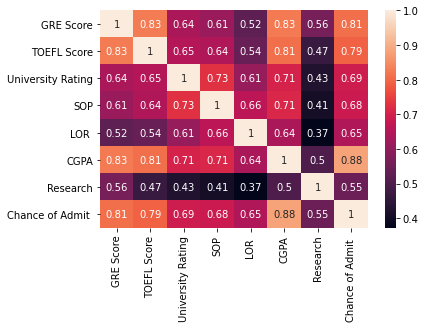

In [33]:
sns.heatmap(df.corr(), annot=True)   #it is used for to see the heatmap of this table.

##### Light color shows great correlation & Dark color shows less correlation

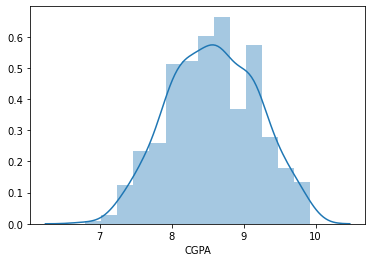

In [34]:
sns.distplot(df.CGPA)

##### CGPA median is between 8 to 9. If your CGPA is greater than 9 your chances of admisssion is Good. And If your CGPA is less than 8 your chances of admission is Bad.

### We plot CGPA,TOEFL Score & GRE Score those three are most correlated

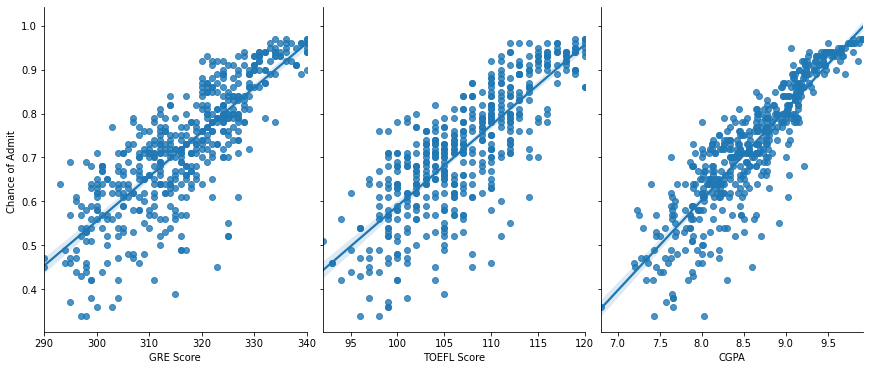

In [35]:
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score','CGPA'],y_vars='Chance of Admit ', height=5, aspect=0.8,kind="reg")

### Create Train Model

In [45]:
x=df[['GRE Score', 'TOEFL Score','CGPA']]

In [46]:
y=df[['Chance of Admit ']]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

##### Check the dataset

In [48]:
x_train.shape

(400, 3)

In [49]:
x_train

,GRE Score,TOEFL Score,CGPA
107,338,117,9.46
336,319,110,8.79
71,336,112,9.76
474,308,105,7.95
6,321,109,8.20
...,...,...,...
323,305,102,8.18
192,322,114,8.94
117,290,104,7.46
47,339,119,9.70


### Create LinearRegression Model

In [50]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Test the Model

In [51]:
predict=model.predict(x_test)

In [52]:
predict

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ],
       [0.64873954],
       [0.71937657],
       [0.6507993 ],
       [0.77885419],
       [0.86739467],
       [0.53882491],
       [0.79022851],
       [0.65400002],
       [0.79288626],
       [0.56219652],
       [0.50909131],
       [0.68659174],
       [0.52225549],
       [0.90081384],
       [0.81905787],
       [0.72911371],
       [0.73958379],
       [0.51931011],
       [0.58999078],
       [0.59490866],
       [0.73030971],
       [0.45888054],
       [0.66340913],
       [0.80448279],
       [0.5787659 ],
       [0.52874102],
       [0.83928376],
       [0.85503615],
       [0.60540057],
       [0.66556749],
       [0.67097019],
       [0.87799247],
       [0.87690238],
       [0.72690446],
       [0.78389973],
       [0.78179638],
       [0.97242781],
       [0.853

In [53]:
y_test.head(5)

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
